In [1]:
#Importing the Libraries

import numpy as np
import pandas as pd
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
dat1 = pd.read_csv('general_data.csv')
dat1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
dat2 = pd.read_csv('employee_survey_data.csv')
dat2.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [5]:
dat3 = pd.read_csv('manager_survey_data.csv')
dat3.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


### Summary of the Dataset

In [6]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df contains your dataset

# Select object columns
object_columns = dat1.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over object columns and apply label encoding
for col in object_columns:
    dat1[col] = label_encoder.fit_transform(dat1[col])

# Display the updated DataFrame
dat1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,4406,0,...,3.0,0,17,8,1,10.0,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,...,2.0,0,15,8,0,10.0,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,...,0.0,0,20,8,0,5.0,4,4,1,2
4408,42,0,2,2,18,2,3,1,4409,1,...,0.0,0,14,8,1,10.0,2,9,7,8


In [8]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [9]:
dat3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


### Descriptive Statistics

In [10]:
df1 = dat1.describe()

# Set the precision to 2 decimal places for all numeric columns
df1 = df1.round(decimals=2)
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.00,4410.00,4410.00,4410.00,4410.00,4410.00,4410.00,4410.0,4410.00,4410.00,...,4391.00,4410.0,4410.00,4410.0,4410.00,4401.00,4410.00,4410.00,4410.00,4410.00
mean,36.92,0.16,1.61,1.26,9.19,2.91,2.25,1.0,2205.50,0.60,...,2.69,0.0,15.21,8.0,0.79,11.28,2.80,7.01,2.19,4.12
std,9.13,0.37,0.67,0.53,8.11,1.02,1.33,0.0,1273.20,0.49,...,2.50,0.0,3.66,0.0,0.85,7.78,1.29,6.13,3.22,3.57
min,18.00,0.00,0.00,0.00,1.00,1.00,0.00,1.0,1.00,0.00,...,0.00,0.0,11.00,8.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,0.00,1.00,1.00,2.00,2.00,1.00,1.0,1103.25,0.00,...,1.00,0.0,12.00,8.0,0.00,6.00,2.00,3.00,0.00,2.00
50%,36.00,0.00,2.00,1.00,7.00,3.00,2.00,1.0,2205.50,1.00,...,2.00,0.0,14.00,8.0,1.00,10.00,3.00,5.00,1.00,3.00
75%,43.00,0.00,2.00,2.00,14.00,4.00,3.00,1.0,3307.75,1.00,...,4.00,0.0,18.00,8.0,1.00,15.00,3.00,9.00,3.00,7.00
max,60.00,1.00,2.00,2.00,29.00,5.00,5.00,1.0,4410.00,1.00,...,9.00,0.0,25.00,8.0,3.00,40.00,6.00,40.00,15.00,17.00


In [11]:
df2 = dat2.describe()

# Set the precision to 2 decimal places for all numeric columns
df2 = df2.round(decimals=2)
df2

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.00,4385.00,4390.00,4372.00
mean,2205.50,2.72,2.73,2.76
std,1273.20,1.09,1.10,0.71
min,1.00,1.00,1.00,1.00
25%,1103.25,2.00,2.00,2.00
50%,2205.50,3.00,3.00,3.00
75%,3307.75,4.00,4.00,3.00
max,4410.00,4.00,4.00,4.00


In [12]:
df3 = dat3.describe()

# Set the precision to 2 decimal places for all numeric columns
df3 = df3.round(decimals=2)
df3

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.00,4410.00,4410.00
mean,2205.50,2.73,3.15
std,1273.20,0.71,0.36
min,1.00,1.00,3.00
25%,1103.25,2.00,3.00
50%,2205.50,3.00,3.00
75%,3307.75,3.00,3.00
max,4410.00,4.00,4.00


### Merging the datasets

In [14]:
# Merge the datasets based on EmployeeID column
merged_df = pd.merge(dat1, dat2, on="EmployeeID")

# Display the merged dataframe
merged_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,2,2,6,2,1,1,1,0,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,1,1,1,10,1,1,1,2,0,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,0,1,1,17,4,4,1,3,1,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,0,0,1,2,5,1,1,4,1,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,0,2,1,10,1,3,1,5,1,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,4406,0,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,0,2,1,2,4,3,1,4407,1,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,0,2,1,25,2,1,1,4408,1,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,0,2,2,18,2,3,1,4409,1,...,8,1,10.0,2,9,7,8,4.0,1.0,3.0


### Exploratory data analysis

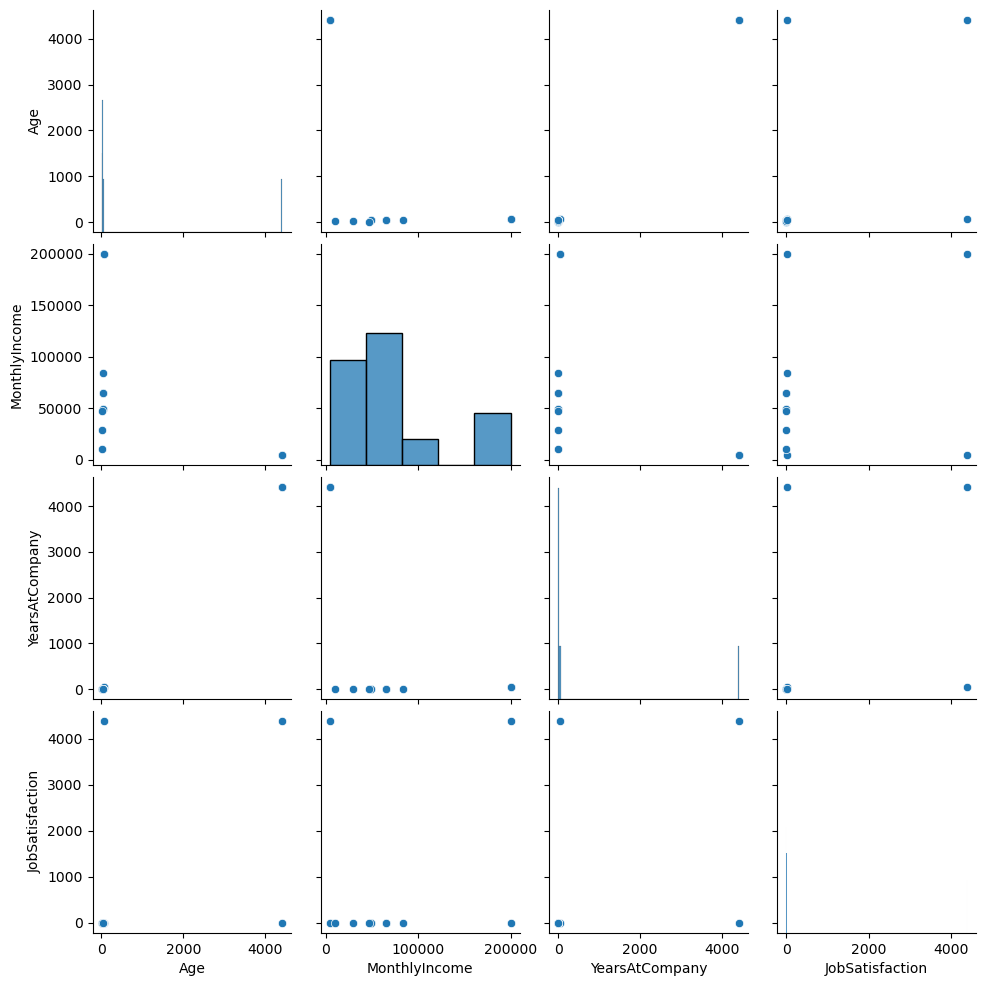

In [15]:
# Multivariate Analysis
sns.pairplot(merged_df[['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction']])
plt.show()

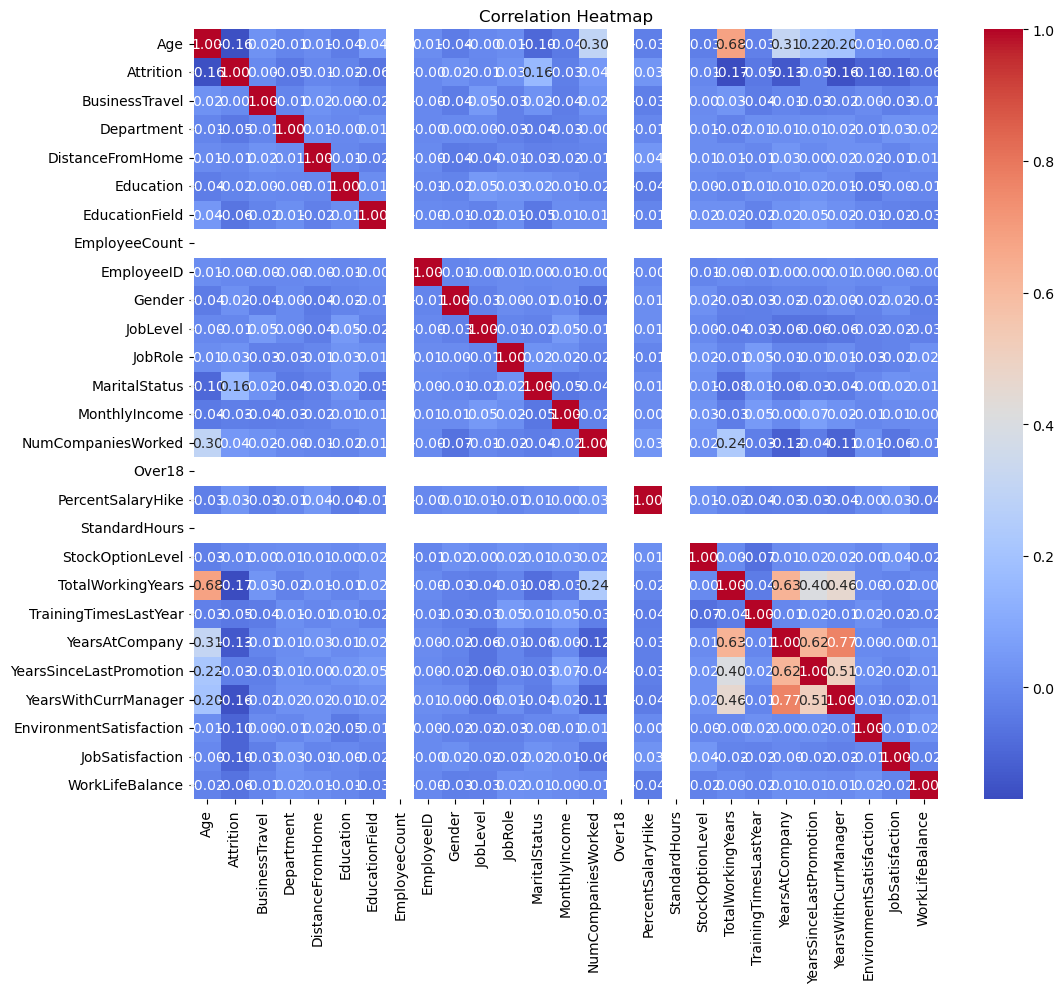

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

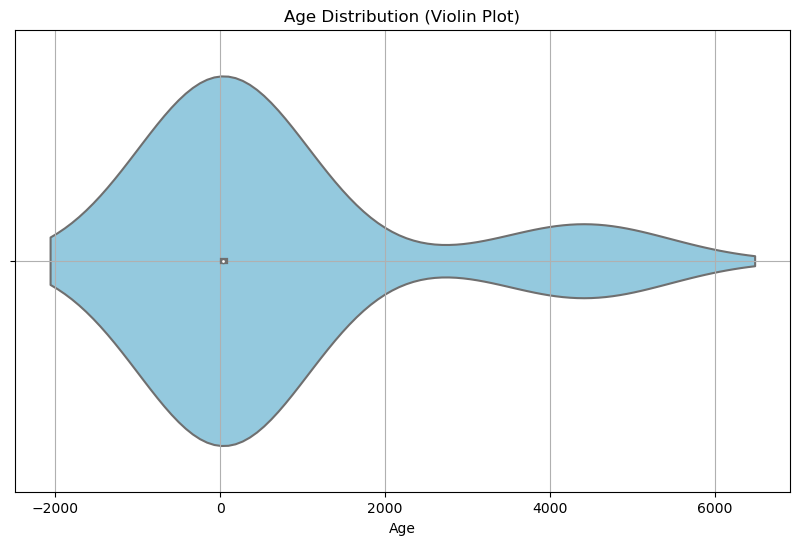

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=merged_df['Age'], color='skyblue')
plt.title('Age Distribution (Violin Plot)')
plt.xlabel('Age')
plt.grid(True)
plt.show()

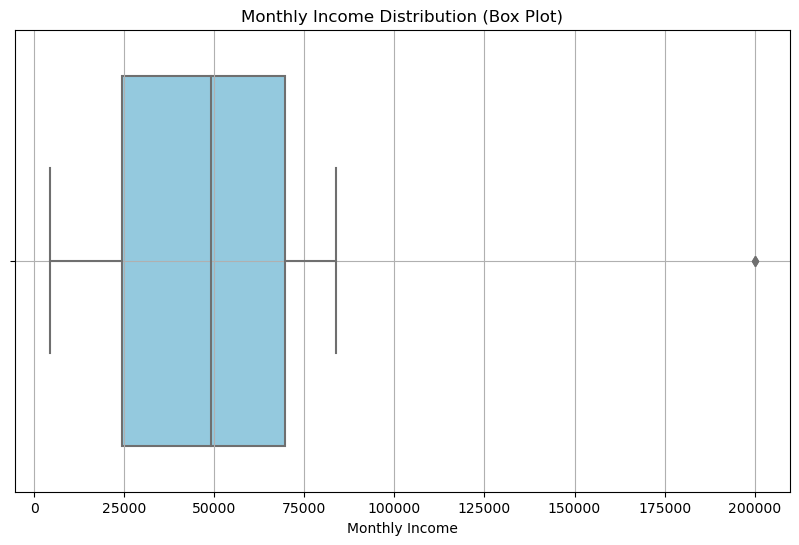

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['MonthlyIncome'], color='skyblue')
plt.title('Monthly Income Distribution (Box Plot)')
plt.xlabel('Monthly Income')
plt.grid(True)
plt.show()

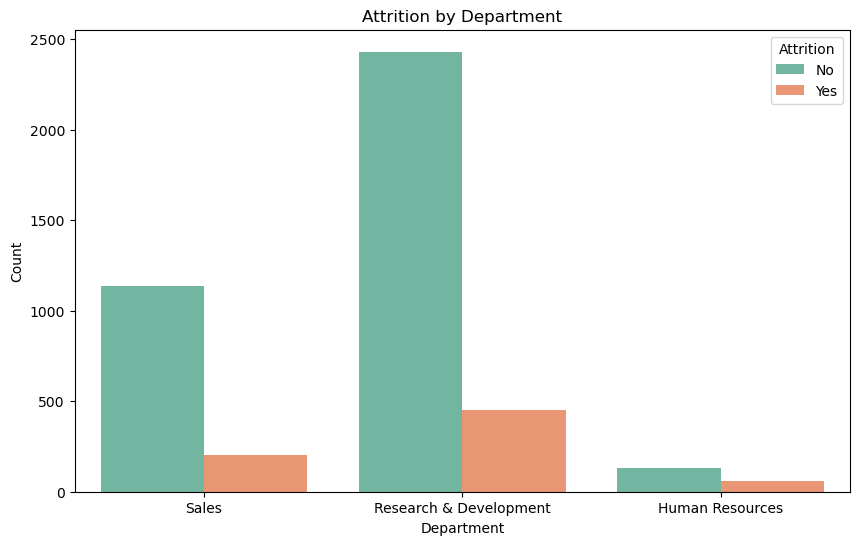

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=dat1, palette='Set2')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

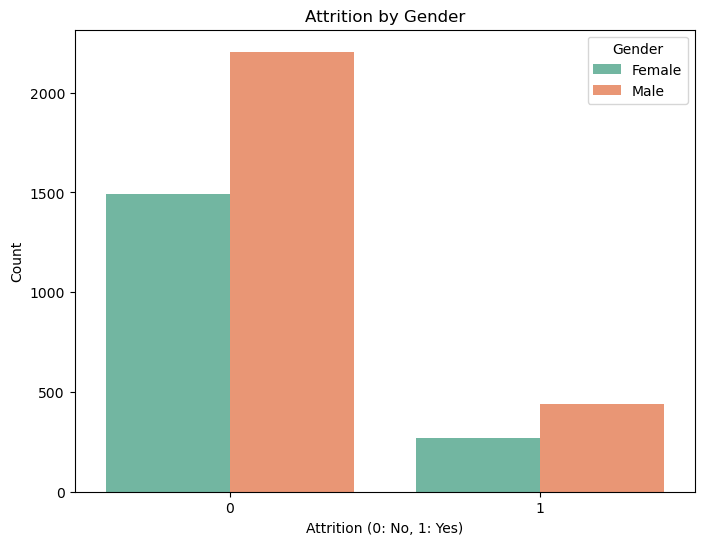

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', hue='Gender', data=dat1, palette='Set2')
plt.title('Attrition by Gender')
plt.xlabel('Attrition (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   int64  
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   int64  
 12  MaritalStatus            4410 non-null   int64  
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [91]:
# Separate the features (X) and target (y)
X = merged_df[['Age', 'BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 
                 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 
                 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                 'YearsAtCompany', 'JobLevel', 'JobRole']]

In [92]:
y = merged_df['Attrition']

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4410 non-null   int64  
 1   BusinessTravel         4410 non-null   int64  
 2   Department             4410 non-null   int64  
 3   Gender                 4410 non-null   int64  
 4   MaritalStatus          4410 non-null   int64  
 5   MonthlyIncome          4410 non-null   int64  
 6   NumCompaniesWorked     4391 non-null   float64
 7   PercentSalaryHike      4410 non-null   int64  
 8   StockOptionLevel       4410 non-null   int64  
 9   TotalWorkingYears      4401 non-null   float64
 10  TrainingTimesLastYear  4410 non-null   int64  
 11  YearsAtCompany         4410 non-null   int64  
 12  JobLevel               4410 non-null   int64  
 13  JobRole                4410 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 516.8 KB


In [94]:
# Fill missing values with median
X.fillna(X.median(), inplace=True)

In [95]:
# Set a random seed for reproducibility
np.random.seed(11)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [96]:
# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=11)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

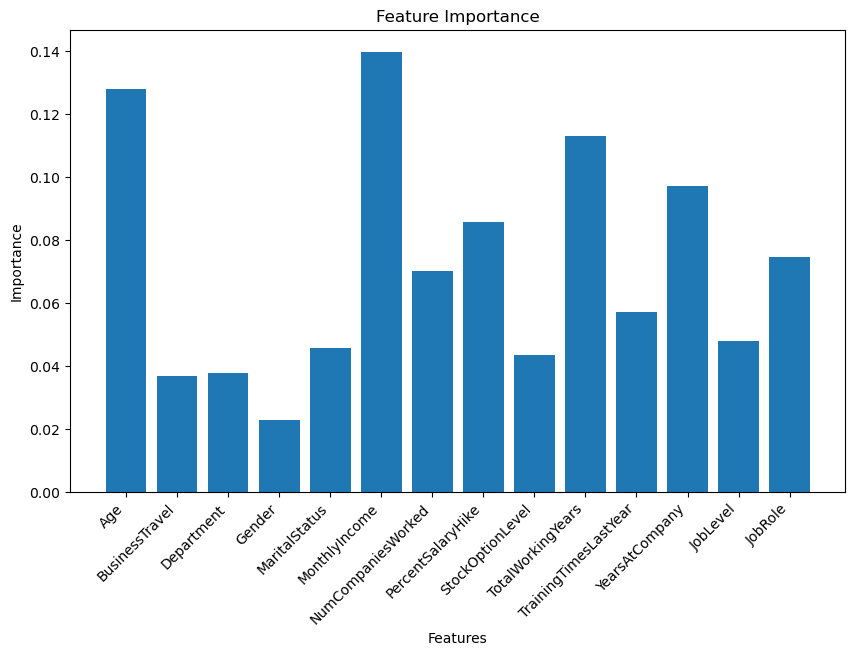

In [100]:
# Retrieve the feature importance from the model
feature_importance = rf_model.feature_importances_

# Plot the feature importance
features = X.columns
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [98]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [99]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9931972789115646

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



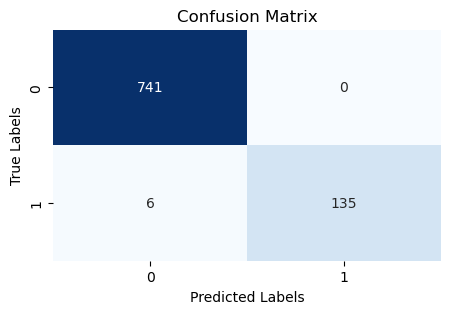

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are the true labels and predicted labels respectively

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [68]:
# Separate the features (X) and target (y)
X = merged_df[['Age', 'BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 
                 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 
                 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                 'YearsAtCompany', 'JobLevel', 'JobRole']]

y = merged_df['Attrition']

In [72]:
# Fill missing values with median
X.fillna(X.median(), inplace=True)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8401360544217688

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       741
           1       0.00      0.00      0.00       141

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.71      0.84      0.77       882



In [81]:
X_Y = merged_df[['Age', 'Attrition' ,'BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 
                 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 
                 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                 'YearsAtCompany', 'JobLevel', 'JobRole']]

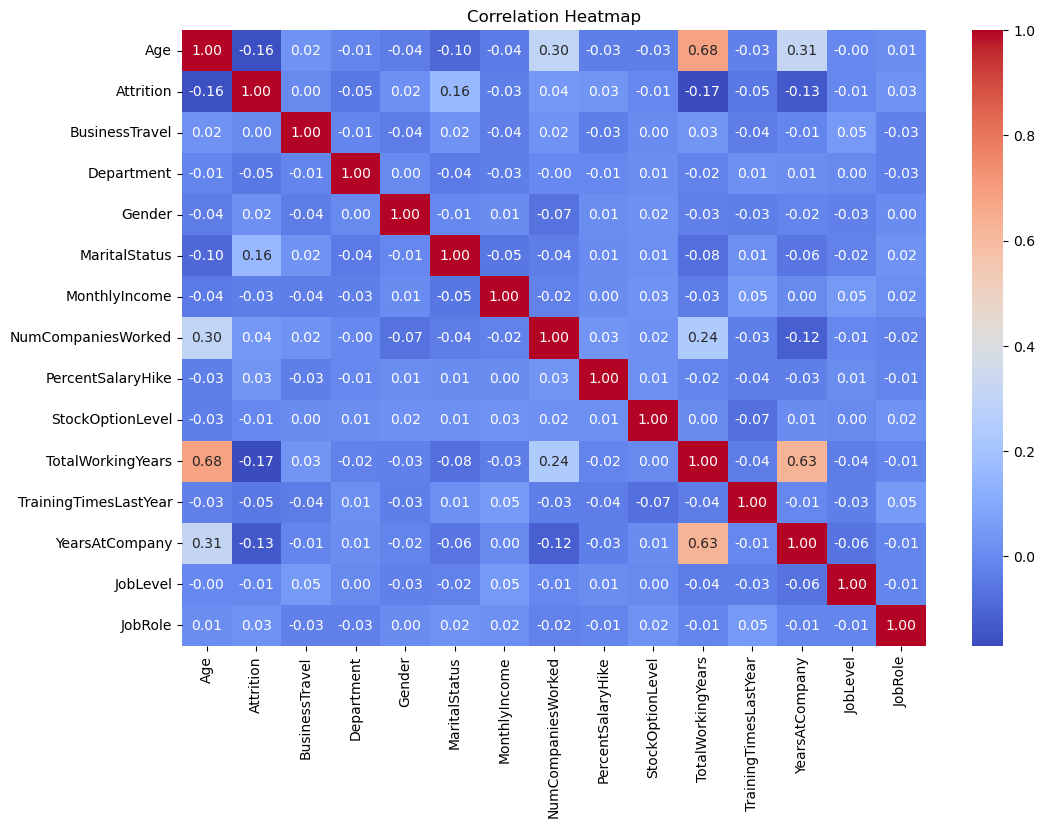

In [89]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_Y.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()